In [2]:
import pandas as pd

# Load the dataset
file_path = 'Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display basic information about the dataset
data.info()

# Check for unique values in each column
unique_values = {col: data[col].nunique() for col in data.columns}
print(unique_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [6]:
# Fill or drop missing values based on context
# For example, if 'TotalCharges' is missing, we might fill it with the median or drop those rows
data['TotalCharges'] = data['TotalCharges'].replace(" ", None).astype(float)  # Replace empty strings with None
data.dropna(subset=['TotalCharges'], inplace=True)  # Drop rows with missing TotalCharges

# Re-check for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Remove duplicates if any
data.drop_duplicates(inplace=True)

Number of duplicate records: 0


In [8]:
# Check for inconsistent formatting or spelling variations
# For example, if we have a 'gender' column, let's see unique values
print(data['gender'].unique())

# Standardize values in the 'gender' column
data['gender'] = data['gender'].str.lower().str.strip()

['Female' 'Male']


In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Convert 'Churn' column to a boolean
data['Churn'] = data['Churn'].map({'Yes': True, 'No': False})

# Convert 'tenure' column to float
data['tenure'] = data['tenure'].astype(float)

# Convert 'TotalCharges' column to float, handling any potential issues with data formatting
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check data types to confirm changes
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                  bool
dtype: object


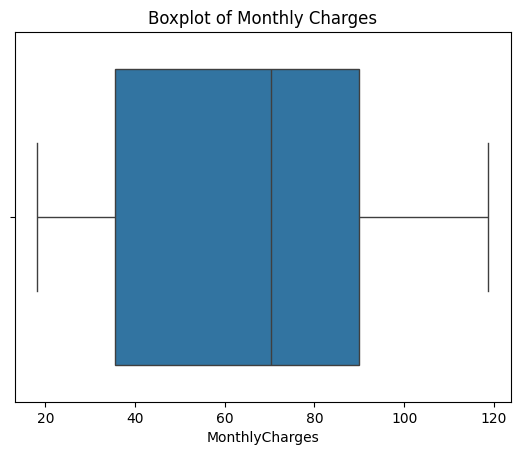

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of a numeric column to identify outliers
sns.boxplot(x=data['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

# Define a method to handle outliers (e.g., using IQR)
Q1 = data['MonthlyCharges'].quantile(0.25)
Q3 = data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['MonthlyCharges'] >= lower_bound) & (data['MonthlyCharges'] <= upper_bound)]

In [ ]:
'''In this step, new features are created that may help in predicting customer churn.
For instance, the 'tenure_years' column converts months into years, and a binary feature 'high_monthly_charge' indicates 
whether a customer's monthly charge is above the median.
'''

In [13]:
# Create new features
data['tenure_years'] = data['tenure'] / 12  # Assuming tenure is in months
data['high_monthly_charge'] = data['MonthlyCharges'] > data['MonthlyCharges'].median()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_years,high_monthly_charge
0,7590-VHVEG,female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,0.083333,False
1,5575-GNVDE,male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,False,2.833333,False
2,3668-QPYBK,male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,0.166667,False
3,7795-CFOCW,male,0,No,No,45.0,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,3.750000,False
4,9237-HQITU,female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,0.166667,True


In [14]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [15]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_years,high_monthly_charge
0,7590-VHVEG,female,0,Yes,No,-1.280248,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,False,0.083333,False
1,5575-GNVDE,male,0,No,No,0.064303,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,-0.260878,-0.173740,False,2.833333,False
2,3668-QPYBK,male,0,No,No,-1.239504,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,True,0.166667,False
3,7795-CFOCW,male,0,No,No,0.512486,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,False,3.750000,False
4,9237-HQITU,female,0,No,No,-1.239504,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,True,0.166667,True
